In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [4]:
#printing shapes of the train and test set
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


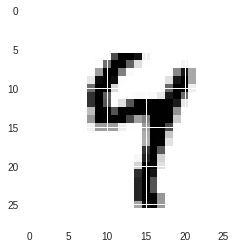

Corresponding one hot label of the image [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [5]:
#printing sample image and its corresponding label
plt.imshow(np.reshape((mnist.train.images[2]) , (28,28)))
plt.show()
print("Corresponding one hot label of the image " + str( mnist.train.labels[2]))


In [0]:
image_size = 28
labels_size = 10
learning_rate = 0.05
steps_number = 1000
batch_size = 100

In [0]:
# Placeholder is a value that we input when we ask TensorFlow to run a computation.
def create_placeholders():
    x = tf.placeholder(tf.float32, shape = [None, 784])
    y_ = tf.placeholder(tf.float32, shape = [None, 10])
    return x , y_

In [0]:
#Function for initializing weights
def weight_variable(shape, i):
    
    initial = tf.get_variable(name = "W" + str(i)  , shape = shape, initializer = tf.contrib.layers.xavier_initializer())
    return initial

#Function for bias
def bias_variable(shape):
    
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)    
  
#Function for convolution with stride = s and same padding!!!!! For example stride = 1 =>[1,1,1,1]
def conv2d(x, W, s):
     
    return tf.nn.conv2d(input = x, filter = W, padding = "SAME", strides = s)

#Function of max pooling over 2*2 block 
def max_pooling_2x2(x):
    
    return tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,2,2,1] ,padding = "SAME")

In [0]:
# The architecture is similar to https://www.tensorflow.org/get_started/mnist/pros without applying the batch normalization
x, y_ = create_placeholders()

# Input layer where single input image shape is (1,784)
x_image = tf.reshape(x, [-1,28,28,1])

# Convolution layer 1 - 32 x 5 x 5 
# Conv -> Relu -> Max_pool
W_conv1 = weight_variable([5, 5, 1, 32], 1)
b_conv1 = bias_variable([32])
x_conv1 = conv2d(x_image, W_conv1, [1,1,1,1]) + b_conv1
y1 = tf.nn.relu(x_conv1)
x_pool1 = max_pooling_2x2(y1)

# Conv layer 2 - 64 x 5 x 5
# Conv -> Relu -> Max_pool
W_conv2 = weight_variable([5, 5, 32, 64], 2)
b_conv2 = bias_variable([64])
x_conv2 = conv2d(x_pool1, W_conv2, [1,1,1,1]) + b_conv2
y2 = tf.nn.relu(x_conv2)
x_pool2 = max_pooling_2x2(y2)

# Flatten 

x_flat = tf.contrib.layers.flatten(x_pool2)  #tf.reshape(x_pool2, [-1, 7 * 7 * 64])

# Dense fully connected layer
x_fc1 = tf.contrib.layers.fully_connected(x_flat, num_outputs = 1024 , activation_fn= tf.nn.relu )    #Tensorflow here takes care of the bias

#Here try 1 without Dropout

#Classification Layer
y_conv = tf.contrib.layers.fully_connected(x_fc1, num_outputs = 10, activation_fn= None)               #Tensorflow here takes care of the bias

In [0]:
# Probabilities output from model
y = tf.nn.softmax(y_conv)

#compute cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits=y_conv))
#train step
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [0]:
# Test accuracy of model
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))     #Returns the index with the largest value across axes of a tensor.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))      #Casts a tensor to a new type.

In [0]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [17]:
# Train model# Train  
for i in tqdm(range(1000)):
    batch = mnist.train.next_batch(100)
    if i%200 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
        print("Epoch %d, training accuracy %g"%(i, train_accuracy))

    train_step.run(feed_dict={x: batch[0], y_: batch[1]})   #op.run() is a shortcut for calling tf.get_default_session().run(op)

  1%|          | 7/1000 [00:00<02:18,  7.19it/s]

Epoch 0, training accuracy 0.14


 21%|██        | 210/1000 [00:03<00:14, 55.46it/s]

Epoch 200, training accuracy 0.87


 41%|████      | 410/1000 [00:06<00:09, 63.05it/s]

Epoch 400, training accuracy 0.95


 61%|██████    | 610/1000 [00:09<00:05, 65.09it/s]

Epoch 600, training accuracy 0.95


 81%|████████  | 810/1000 [00:12<00:02, 66.96it/s]

Epoch 800, training accuracy 0.96


100%|██████████| 1000/1000 [00:14<00:00, 68.03it/s]


In [18]:
print(train_accuracy)
print((mnist.test.labels[:,2]))
#Save model
saver = tf.train.Saver()
saver.save(sess, "./classifier")

0.96
[0. 1. 0. ... 0. 0. 0.]


'./classifier'

In [19]:
# Test model# Test 
for i in tqdm(range(1000)):
    batch = mnist.test.next_batch(100)
    if i%200 == 0:
        test_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1]})  #t.eval() is a shortcut for calling tf.get_default_session().run(t)
        print("Epoch %d, test accuracy %g"%(i, test_accuracy))

100%|██████████| 1000/1000 [00:00<00:00, 5013.90it/s]

Epoch 0, test accuracy 0.98
Epoch 200, test accuracy 0.97
Epoch 400, test accuracy 1
Epoch 600, test accuracy 0.97
Epoch 800, test accuracy 0.96


In [20]:
print(test_accuracy)

0.96


In [0]:
sess.close()


# VISUALIZING CONVOLUTIONS AND POOLING OVER AN IMAGE

In [0]:
x1 = tf.placeholder(tf.float32, shape = [784,])

In [0]:


# Input layer where single input image shape is (1,784)
x_image = tf.reshape(x1, [-1,28,28,1])

# Convolution layer 1 - 32 x 5 x 5 
# Conv -> Relu -> Max_pool
W_con = tf.get_variable(name = "W3912" , shape = [5,5,1,32], initializer = tf.contrib.layers.xavier_initializer())
b_con = tf.Variable(tf.constant(0.1, shape=[32]))
x_con = tf.nn.conv2d(input = x_image, filter = W_con, padding = "SAME", strides = [1,1,1,1])

In [0]:
xcon1  = tf.nn.conv2d(input = x_image, filter = W_con, padding = "VALID", strides = [1,1,1,1])

In [0]:
#W_conv2 = weight_variable([5, 5, 32, 64], 2)
b_conv2 = bias_variable([64])
x_conv2 = conv2d(dd4i, W_conv2, [1,1,1,1]) + b_conv2
y2 = tf.nn.relu(x_conv2)
x_pool2 = max_pooling_2x2(y2)

In [0]:
def relu(name):
    return tf.nn.relu(name)
def pool(name):
    return max_pooling_2x2(name)

In [0]:

with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      dd2 = sess.run(xcon1, feed_dict = {x1 : mnist.train.images[32]})
      dd1 = sess.run(x_con, feed_dict = {x1 : mnist.train.images[32]})
      dd3 = sess.run(relu(dd2))
      dd4 = sess.run(pool(dd3))
      dd5 = sess.run(x_conv2)
      dd6 = sess.run(y2)
      dd7 = sess.run(x_pool2)

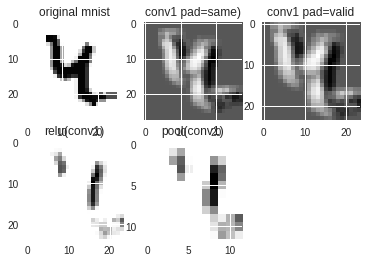

In [141]:
a = np.reshape(mnist.train.images[32], (28,28))
b = dd1[0][:,:,0]
c = dd2[0][:,:,0]
d = dd3[0][:,:,0]
e = dd4[0][:,:,0]
fig = plt.figure()
plt.subplot(2,3,1)
plt.title("original mnist")
plt.imshow(a)
plt.subplot(2,3,2)
plt.title("conv1 pad=same)")
plt.imshow(b)
plt.subplot(2,3,3)
plt.title("conv1 pad=valid")
plt.imshow(c)
plt.subplot(2,3,4)
plt.title("relu(conv1)")
plt.imshow(d)
plt.subplot(2,3,5)
plt.title("pool(conv1)")
plt.imshow(e)


1st covolution


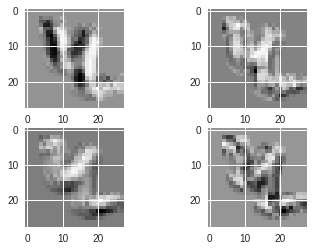

In [180]:
print("1st covolution")
for i in range(4):
     plt.subplot(2,2,i+1)
     plt.imshow(dd1[0][:,:,i])

After relu


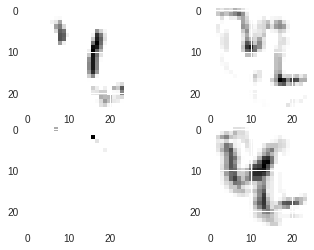

In [179]:
print("After relu")
fig = plt.figure()
for i in range(4):
     plt.subplot(2,2,i+1)
     plt.imshow(dd3[0][:,:,i])

After max pool


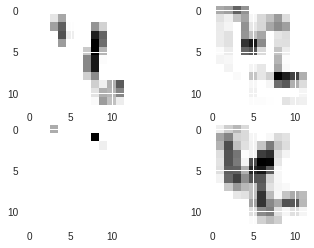

In [178]:
print('After max pool')
for i in range(4):
     plt.subplot(2,2,i+1)
     plt.imshow(dd4[0][:,:,i])

After 2nd conv


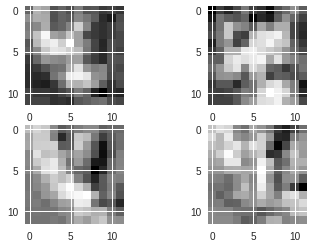

In [177]:
print('After 2nd conv')
for i in range(4):
          plt.subplot(2,2,i+1)
          plt.imshow(dd5[0][:,:,i])

After relu


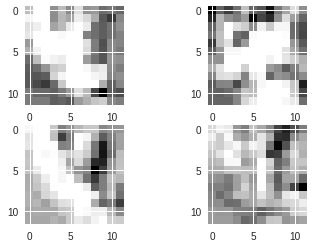

In [176]:
print('After relu')
for i in range(4):
          plt.subplot(2,2,i+1)
          plt.imshow(dd6[0][:,:,i])

After pool


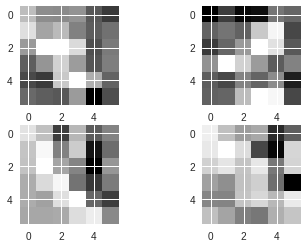

In [175]:
print('After pool')
for i in range(4):
          plt.subplot(2,2,i+1)
          plt.imshow(dd7[0][:,:,i])